In [358]:
%run func_def.ipynb

**imports loaded.

> Pre-Processing func:
    get_height(item)
    get_weight(item)
    get_reach(item)
    get_std_reach(item, height, reach_list, height_list)
    get_age(item)
    get_std_age(item, age_list)
    get_win_prob(name, date, df)
    get_win_streak(name, date, df) #return count of recent wins
    get_lose_streak(name, date, df)
    get_fighter_stats(name, data )

> Feature Engineering func:
    get_stat(index, data, stat='height', fo='')
    get_swaped_row(index, data) # return fighter & opponent statistics swapped. 
    get_wins(combo, data)
    get_wins_ratio(combo, data)

> outlier_cleaning func:
    set_outlier_detection_model(X_columns, data)

> model_stats_pred_training func:
    set_lower_cases(string)
    set_train_test(X_columns, y_columns, data, test_size=0.3, valid_size=0.3)
    set_xgboost_reg(X_columns, y_columns, data, n=200, learning_rate=0.2, subsample=0.4, max_depth=5)
    set_predictions(model, data, X_columns, y_columns)
    get_mean_percentage_error(ac

### <span style='color:green'> **[done]** </span>Insert new fight:

In [359]:
fighter = 'Aljamain Sterling'
opponent = 'Henry Cejudo'
print(fighter + ' vs ' + opponent)

Aljamain Sterling vs Henry Cejudo


### <span style='color:green'> **[done]** </span>Load main data frame:

In [360]:
df = pd.read_csv('../data/data_features_outliers_detected.csv')
df.head(3)

,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,outlier,lof_outlier
0,lose,Arnold Allen,Max Holloway,2023-04-15,Featherweight,U-DEC,Unanimous,-0.008237,-2.638700,-0.005118,0.003509,0.484241,-0.278875,0.0,-2.387894,-0.559495,-1.205020,0.188148,1.546458,0.659621,5.555176,-1.019062,True,True
1,win,Edson Barboza,Billy Quarantillo,2023-04-15,Featherweight,KO/TKO,Knee,1.336643,0.048134,-0.005118,0.003509,-0.619579,0.585567,-1.1,-2.412970,-1.138662,-1.040880,1.584773,-0.131691,-0.305890,-0.571006,2.038123,False,False
2,win,Azamat Murzakanov,Dustin Jacoby,2023-04-15,Light Heavyweight,U-DEC,Unanimous,1.336643,0.084940,-0.005118,0.003509,0.209687,0.793033,0.0,-0.538553,0.847052,-0.561087,-0.073719,1.546458,0.486324,0.542845,-1.019062,False,False


#### <span style='color:green'> **[done]** </span>Load stats data frame:

In [361]:
stat = pd.read_csv('../../web_scrapers/data/ufc_fighters_stats.csv')
stat.tail(3)

,name,wins,losses,draws,height,weight,reach,stance,dob,slpm,str_acc,sapm,str_def,td_avg,td_acc,td_def,sub_avg,last_update,last_match,url
2382,Aaron Phillips,12,5,0,"5'9""",135lbs.,"71""",Southpaw,"Aug05,1989",1.51,53%,3.66,43%,0.86,50%,44%,0.6,05-22-2023,04-15-2023,http://ufcstats.com/fighter-details/34c2b3656f...
2383,Joselyne Edwards,13,4,0,"5'8""",135lbs.,"70""",Orthodox,"Sep29,1995",5.30,52%,3.48,51%,0.33,15%,64%,0.2,05-22-2023,04-15-2023,http://ufcstats.com/fighter-details/f9ab66e672...
2384,Lucie Pudilova,14,8,0,"5'8""",135lbs.,"67""",Orthodox,"Jun13,1994",3.97,37%,3.95,51%,0.62,27%,63%,0.6,05-22-2023,04-15-2023,http://ufcstats.com/fighter-details/3cf66c62d9...


### <span style='color:green'> **[done]** </span>Set new match:

In [362]:
match = {'result':None,
         'fighter':fighter,
         'opponent':opponent,
         'date':get_current_date(),
         'weight_class':df.weight_class[df.fighter==fighter].iloc[0],
         'method':None,
         'type':None,
         'kd_dif':None,
         'str_dif':None,
         'td_dif':None,
         'sub_dif':None,
         'td_avg_dif':None,
         'td_def_dif':None,
         'sub_avg_dif':None,
         'slpm_dif':None,
         'str_acc_dif':None,
         'sapm_dif':None,
         'str_def_dif':None,
         
         'stance_win_ratio':get_stance_wins_ratio(fighter=fighter, data=df) - get_stance_wins_ratio(fighter=opponent, data=df),
         'win_perc_dif':get_win_perc(fighter=fighter, data=df) - get_win_perc(fighter=opponent, data=df),
         'win_strk_dif':get_fighter_win_streak(fighter=fighter, data=df) - get_fighter_win_streak(fighter=opponent, data=df),
         'lose_strk_dif':get_fighter_lose_streak(fighter=fighter, data=df) - get_fighter_lose_streak(fighter=opponent, data=df),
         'outlier':None,
         'lof_outlier':None
        }

#statistic dif:
for column in ['td_avg','td_def','sub_avg','slpm','str_acc','sapm','str_def']:
    fighter_stat = stat[column][stat.name==fighter].iloc[0]
    opponent_stat = stat[column][stat.name==opponent].iloc[0]
    try:
        match[column + '_dif'] = round(fighter_stat - opponent_stat,3)
    except:
        fighter_stat = float(fighter_stat[:fighter_stat.find('%')])
        opponent_stat = float(opponent_stat[:opponent_stat.find('%')])
        match[column + '_dif'] = round((fighter_stat - opponent_stat)/100,3)
        continue  

match_df = pd.DataFrame(data=match,index=[0])
match_df

,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,outlier,lof_outlier
0,None,Aljamain Sterling,Henry Cejudo,2023-05-31,Bantamweight,None,None,None,None,None,None,-0.05,-0.38,0.6,0.85,0.05,-0.78,-0.02,1.409642,0.064,9,-1,None,None


### <span style='color:green'> **[done]** </span>Set Prediction:

In [363]:
# Loading pre-trained models
weight = match['weight_class'].lower()
stat_pred = load_trained_model(file_path='../global_variables/stats_pred_' + weight + '_xgboost_reg.pkl')

result_pred = load_trained_model(file_path='../global_variables/result_pred_' + weight + '_logistic_reg.pkl')

method_pred = load_trained_model(file_path='../global_variables/method_pred_knn_classifier.pkl')

# Predicting:
match_df.loc[0,['kd_dif','str_dif','td_dif','sub_dif']] = stat_pred.predict(match_df[stat_pred.feature_names_in_])[0]
match_df.loc[0,'result'] = result_pred.predict(match_df[result_pred.feature_names_in_])

In [364]:
match_df

,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,outlier,lof_outlier
0,win,Aljamain Sterling,Henry Cejudo,2023-05-31,Bantamweight,None,None,0.686254,2.034142,-0.153054,0.584883,-0.05,-0.38,0.6,0.85,0.05,-0.78,-0.02,1.409642,0.064,9,-1,None,None


In [365]:
#prepare 'result' as feature for method prediction:
df = pd.concat([df,match_df]).reset_index(drop=True)

for i in range(len(df)):
    if df.loc[i,'result'] == 'win':
        df.loc[i,'result'] = int(1)
    else:
        df.loc[i,'result'] = int(0)

match_df = df[(df.fighter==fighter)&(df.opponent==opponent)].reset_index(drop=True)        
df.tail(3)

,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,outlier,lof_outlier
6366,1,Mohammed Usman,Junior Tafa,2023-04-22,Heavyweight,U-DEC,Unanimous,-0.008237,-0.577567,0.780221,0.003509,0.831636,-2.872200,0.0,-0.337947,-0.724972,1.370710,-2.081366,-0.131691,2.466859,0.542845,0.0,False,True
6367,1,William Gomis,Francis Marshall,2023-04-22,Featherweight,S-DEC,Split,-0.008237,0.416194,-0.790457,-1.715509,-1.235925,2.452761,-0.8,-1.315903,0.516100,-1.545925,2.108507,1.546458,-0.008809,-0.014081,0.0,False,False
6368,1,Aljamain Sterling,Henry Cejudo,2023-05-31,Bantamweight,None,None,0.686254,2.034142,-0.153054,0.584883,-0.050000,-0.380000,0.6,0.850000,0.050000,-0.780000,-0.020000,1.409642,0.064000,9.000000,-1.0,None,None


In [367]:
# Predicting way of winning:
match_df.loc[0,'method'] = method_pred.predict(match_df[method_pred.feature_names_in_])

,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,outlier,lof_outlier
0,1,Aljamain Sterling,Henry Cejudo,2023-05-31,Bantamweight,decision,None,0.686254,2.034142,-0.153054,0.584883,-0.05,-0.38,0.6,0.85,0.05,-0.78,-0.02,1.409642,0.064,9.0,-1.0,None,None


### <span style='color:green'> **[done]** </span>Presenting results:

In [375]:
res = {'fighter':fighter,
       'opponent':opponent,
       'weight_class':match_df.loc[0,'weight_class'],
       'winner':fighter if match_df.loc[0,'result'] == 1 else opponent,
       'By way of':match_df.loc[0,'method'],
       'win_probability':1
      }

print(res)

{'fighter': 'Aljamain Sterling', 'opponent': 'Henry Cejudo', 'weight_class': 'Bantamweight', 'winner': 'Aljamain Sterling', 'By way of': 'decision', 'win_probability': 1}


In [ ]:
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

### <span style='color:green'> **[done]** </span>Set new match:

In [304]:
match = {'result':None,
         'fighter':fighter,
         'opponent':opponent,
         'date':get_current_date(),
         'weight_class':df.weight_class[df.fighter==fighter].iloc[0],
         'method':None,
         'type':None,
         'kd_dif':None,
         'str_dif':None,
         'td_dif':None,
         'sub_dif':None,
         'td_avg_dif':None,
         'td_def_dif':None,
         'sub_avg_dif':None,
         'slpm_dif':None,
         'str_acc_dif':None,
         'sapm_dif':None,
         'str_def_dif':None,
         
         'stance_win_ratio':get_stance_wins_ratio(fighter=fighter, data=df) - get_stance_wins_ratio(fighter=opponent, data=df),
         'win_perc_dif':get_win_perc(fighter=fighter, data=df) - get_win_perc(fighter=opponent, data=df),
         'win_strk_dif':get_fighter_win_streak(fighter=fighter, data=df) - get_fighter_win_streak(fighter=opponent, data=df),
         'lose_strk_dif':get_fighter_lose_streak(fighter=fighter, data=df) - get_fighter_lose_streak(fighter=opponent, data=df),
         'outlier':None,
         'lof_outlier':None
        }

#statistic dif:
for column in ['td_avg','td_def','sub_avg','slpm','str_acc','sapm','str_def']:
    fighter_stat = stat[column][stat.name==fighter].iloc[0]
    opponent_stat = stat[column][stat.name==opponent].iloc[0]
    try:
        match[column + '_dif'] = round(fighter_stat - opponent_stat,3)
    except:
        fighter_stat = float(fighter_stat[:fighter_stat.find('%')])
        opponent_stat = float(opponent_stat[:opponent_stat.find('%')])
        match[column + '_dif'] = round((fighter_stat - opponent_stat)/100,3)
        continue  

match_df = pd.DataFrame(data=match,index=[0])
match_df

,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,outlier,lof_outlier
0,None,Aljamain Sterling,Henry Cejudo,2023-05-31,Bantamweight,None,None,None,None,None,None,-0.05,-0.38,0.6,0.85,0.05,-0.78,-0.02,1.409642,0.064,9,-1,None,None


### <span style='color:green'> **[done]** </span>Loading prediction Models:

In [305]:
weight = match['weight_class'].lower()
stat_pred = load_trained_model(file_path='../global_variables/stats_pred_' + weight + '_xgboost_reg.pkl')
X = stat_pred.feature_names_in_

y = ['kd_dif','str_dif','td_dif','sub_dif']
feature_importance = stat_pred.feature_importances_

fi = pd.DataFrame(data=feature_importance, index=X, columns=['feature_importances']).sort_values(by=['feature_importances'], ascending=False)
print('Model loaded: %s\n' %stat_pred)
fi

Model loaded: XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=11, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=300, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)



,feature_importances
win_strk_dif,0.404114
str_acc_dif,0.090379
sapm_dif,0.080288
slpm_dif,0.079715
sub_avg_dif,0.073985
win_perc_dif,0.064662
td_avg_dif,0.047927
td_def_dif,0.047453
str_def_dif,0.043058
stance_win_ratio,0.039854


#### <span style='color:green'> **[done]** </span>Predict fight statistics:

In [306]:
stats_pred_list = stat_pred.predict(match_df[stat_pred.feature_names_in_])

i = 0
for stat in ['kd_dif','str_dif','td_dif','sub_dif']:
    match_df.loc[0,stat] = stats_pred_list[0][i]
    i += 1

match_df

,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,outlier,lof_outlier
0,None,Aljamain Sterling,Henry Cejudo,2023-05-31,Bantamweight,None,None,0.686254,2.034142,-0.153054,0.584883,-0.05,-0.38,0.6,0.85,0.05,-0.78,-0.02,1.409642,0.064,9,-1,None,None


### <span style='color:green'> **[done]** </span>Predict winner:

In [307]:
result_pred = load_trained_model(file_path='../global_variables/result_pred_' + weight + '_logistic_reg.pkl')
X = result_pred.feature_names_in_
y = ['result']
coef = result_pred.coef_

print('Model loaded: %s\n' %result_pred)

Model loaded: LogisticRegression(C=0.01)



In [308]:
match_df.loc[0,'result'] = result_pred.predict(match_df[result_pred.feature_names_in_])
match_df

,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,outlier,lof_outlier
0,win,Aljamain Sterling,Henry Cejudo,2023-05-31,Bantamweight,None,None,0.686254,2.034142,-0.153054,0.584883,-0.05,-0.38,0.6,0.85,0.05,-0.78,-0.02,1.409642,0.064,9,-1,None,None


In [271]:
df['win_probability'] = result_pred.predict_proba(df[X])[:,1]
match_df['win_probability'] = result_pred.predict_proba(match_df[X])[:,1]
match_df

,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,outlier,lof_outlier,win_probability
0,win,Aljamain Sterling,Henry Cejudo,2023-05-29,Bantamweight,None,None,0.686254,2.034142,-0.153054,0.584883,-0.05,-0.38,0.6,0.85,0.05,-0.78,-0.02,1.409642,0.064,9,-1,None,None,0.753379


#### <span style='color:green'> **[done]** </span>Model Visualization: Knock-downs

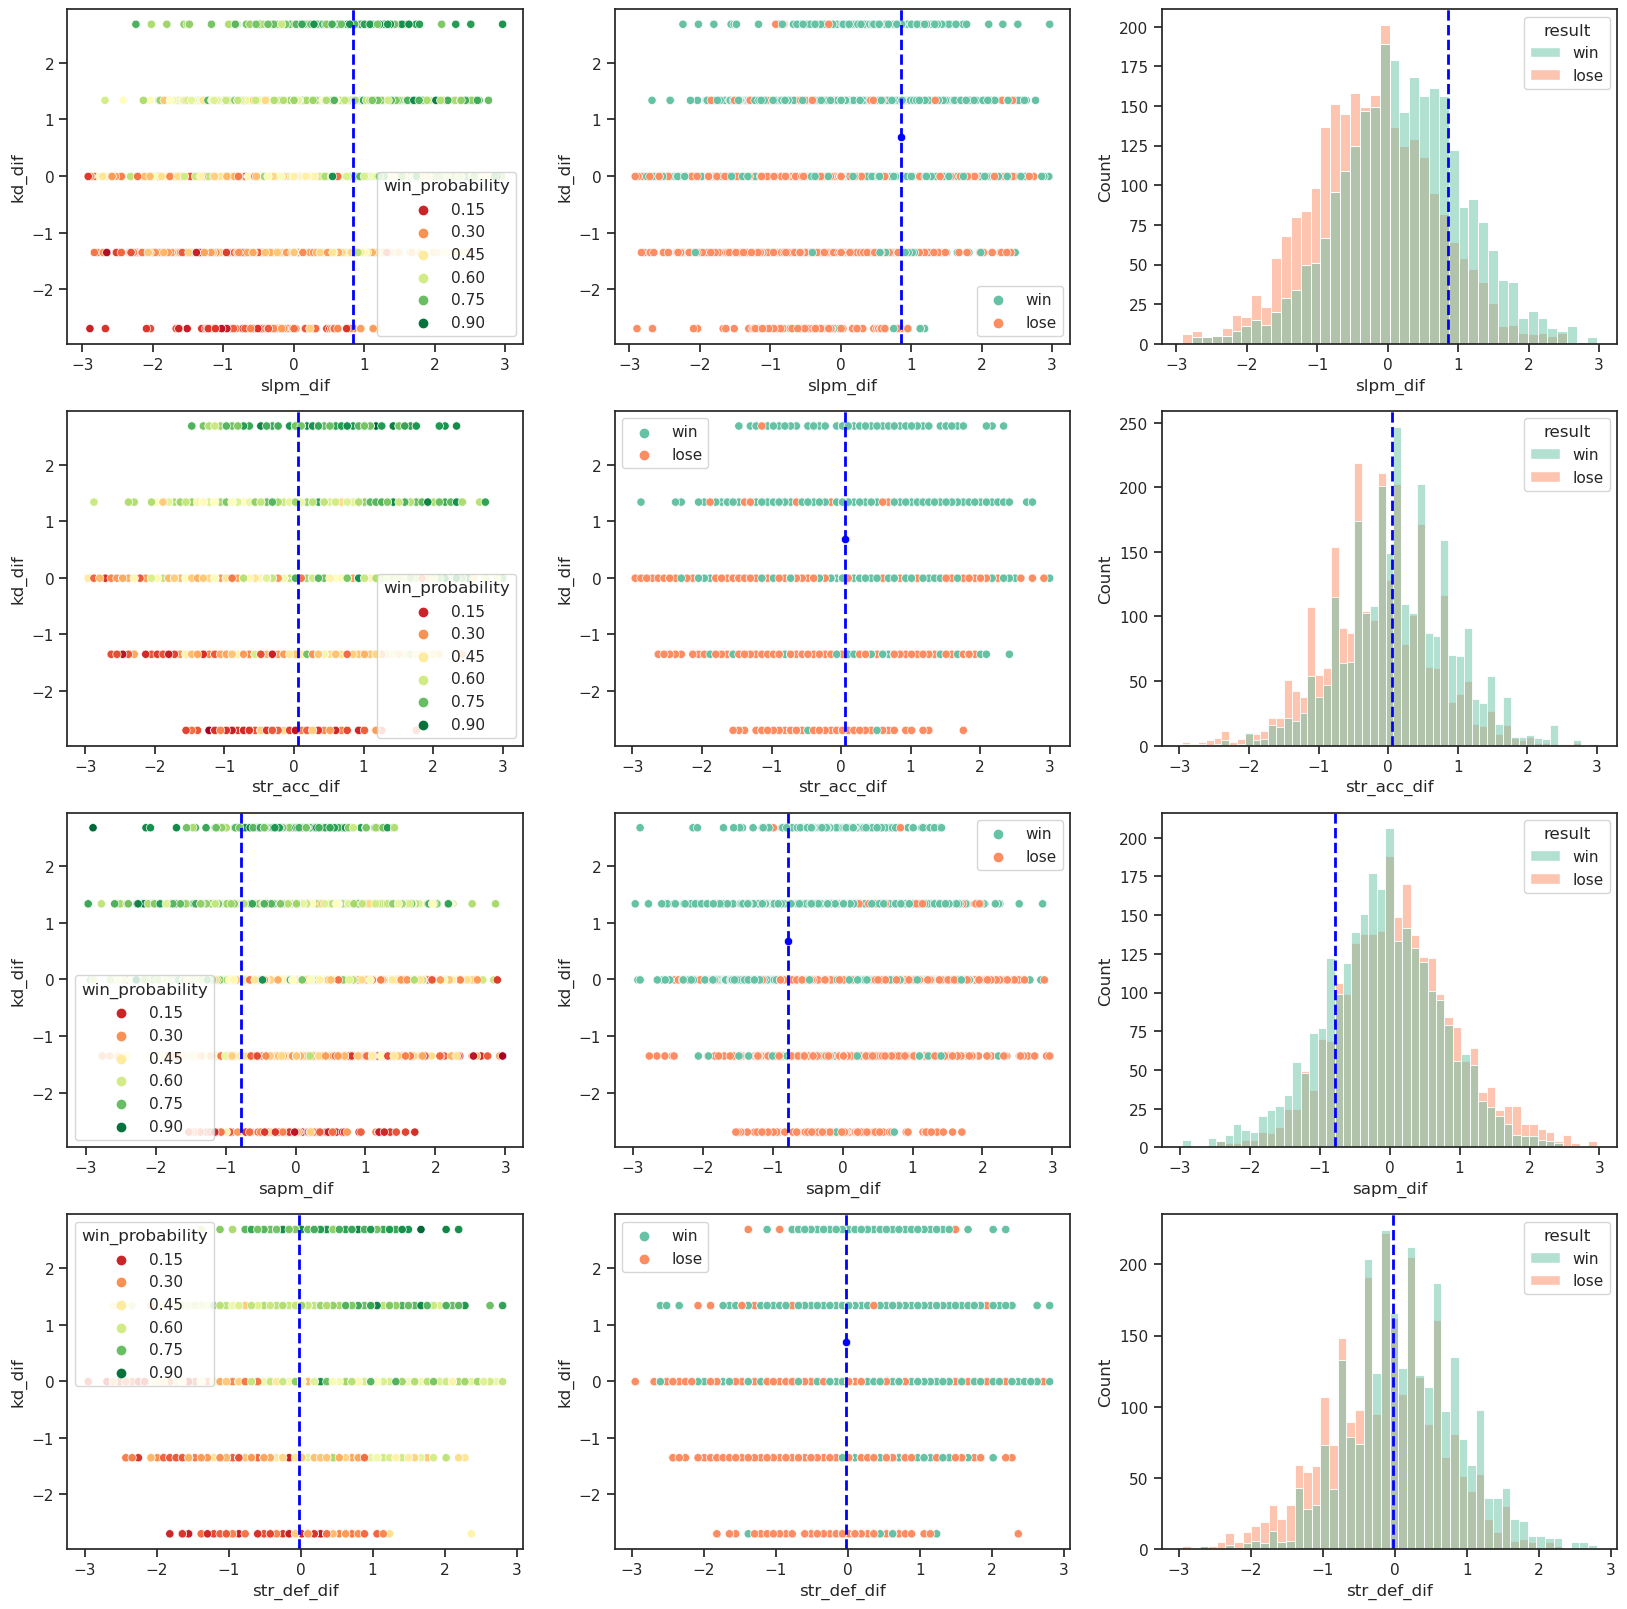

In [272]:
rows=4
cols=3
sns.set_palette("Set2")
fig, axs = plt.subplots(rows,cols,figsize = (20,20))
COLOR='blue'
ALPHA = 1
PALETTE = 'RdYlGn'
data = df[(df.outlier==False)&(df.lof_outlier==False)]

ys = ['kd_dif','str_dif','td_dif','sub_dif'],
features = [['slpm_dif','str_acc_dif','sapm_dif','str_def_dif'],
         ['slpm_dif','str_acc_dif','sapm_dif','str_def_dif'],
         ['td_avg_dif','td_def_dif','sub_avg_dif'],
         ['sub_avg_dif']]

y,x = 'kd_dif','slpm_dif'
i,j = 0,0
sns.scatterplot(ax=axs[i,j], x=x, y=y, data=data, hue='win_probability', alpha=ALPHA, palette=PROB_PALETTE)
axs[i,j].axvline(x=match_df.loc[0,x], color=COLOR, linestyle='--')

sns.scatterplot(ax=axs[i,j+1], x=x, y=y, data=data, hue='result', alpha=ALPHA)
axs[i,j+1].axvline(x=match_df.loc[0,x], color=COLOR, linestyle='--')
sns.scatterplot(ax=axs[i,j+1], x=x, y=y, data=match_df,color=COLOR)

sns.histplot(ax=axs[i,j+2], data=data,x=x, hue='result')
axs[i,j+2].axvline(x=match_df.loc[0,x], color=COLOR, linestyle='--')

y,x = 'kd_dif','str_acc_dif'
i,j = 1,0
sns.scatterplot(ax=axs[i,j], x=x, y=y, data=data, hue='win_probability', alpha=ALPHA, palette=PROB_PALETTE)
axs[i,j].axvline(x=match_df.loc[0,x], color=COLOR, linestyle='--')

sns.scatterplot(ax=axs[i,j+1], x=x, y=y, data=data, hue='result', alpha=ALPHA)
axs[i,j+1].axvline(x=match_df.loc[0,x], color=COLOR, linestyle='--')
sns.scatterplot(ax=axs[i,j+1], x=x, y=y, data=match_df,color=COLOR)

sns.histplot(ax=axs[i,j+2], data=data,x=x, hue='result')
axs[i,j+2].axvline(x=match_df.loc[0,x], color=COLOR, linestyle='--')

y,x = 'kd_dif','sapm_dif'
i,j = 2,0
sns.scatterplot(ax=axs[i,j], x=x, y=y, data=data, hue='win_probability', alpha=ALPHA, palette=PROB_PALETTE)
axs[i,j].axvline(x=match_df.loc[0,x], color=COLOR, linestyle='--')

sns.scatterplot(ax=axs[i,j+1], x=x, y=y, data=data, hue='result', alpha=ALPHA)
axs[i,j+1].axvline(x=match_df.loc[0,x], color=COLOR, linestyle='--')
sns.scatterplot(ax=axs[i,j+1], x=x, y=y, data=match_df,color=COLOR)

sns.histplot(ax=axs[i,j+2], data=data,x=x, hue='result')
axs[i,j+2].axvline(x=match_df.loc[0,x], color=COLOR, linestyle='--')

y,x = 'kd_dif','str_def_dif'
i,j = 3,0
sns.scatterplot(ax=axs[i,j], x=x, y=y, data=data, hue='win_probability', alpha=ALPHA, palette=PROB_PALETTE)
axs[i,j].axvline(x=match_df.loc[0,x], color=COLOR, linestyle='--')

sns.scatterplot(ax=axs[i,j+1], x=x, y=y, data=data, hue='result', alpha=ALPHA)
axs[i,j+1].axvline(x=match_df.loc[0,x], color=COLOR, linestyle='--')
sns.scatterplot(ax=axs[i,j+1], x=x, y=y, data=match_df,color=COLOR)

sns.histplot(ax=axs[i,j+2], data=data,x=x, hue='result')
axs[i,j+2].axvline(x=match_df.loc[0,x], color=COLOR, linestyle='--')

#### <span style='color:green'> **[done]** </span>Model Visualization: striking

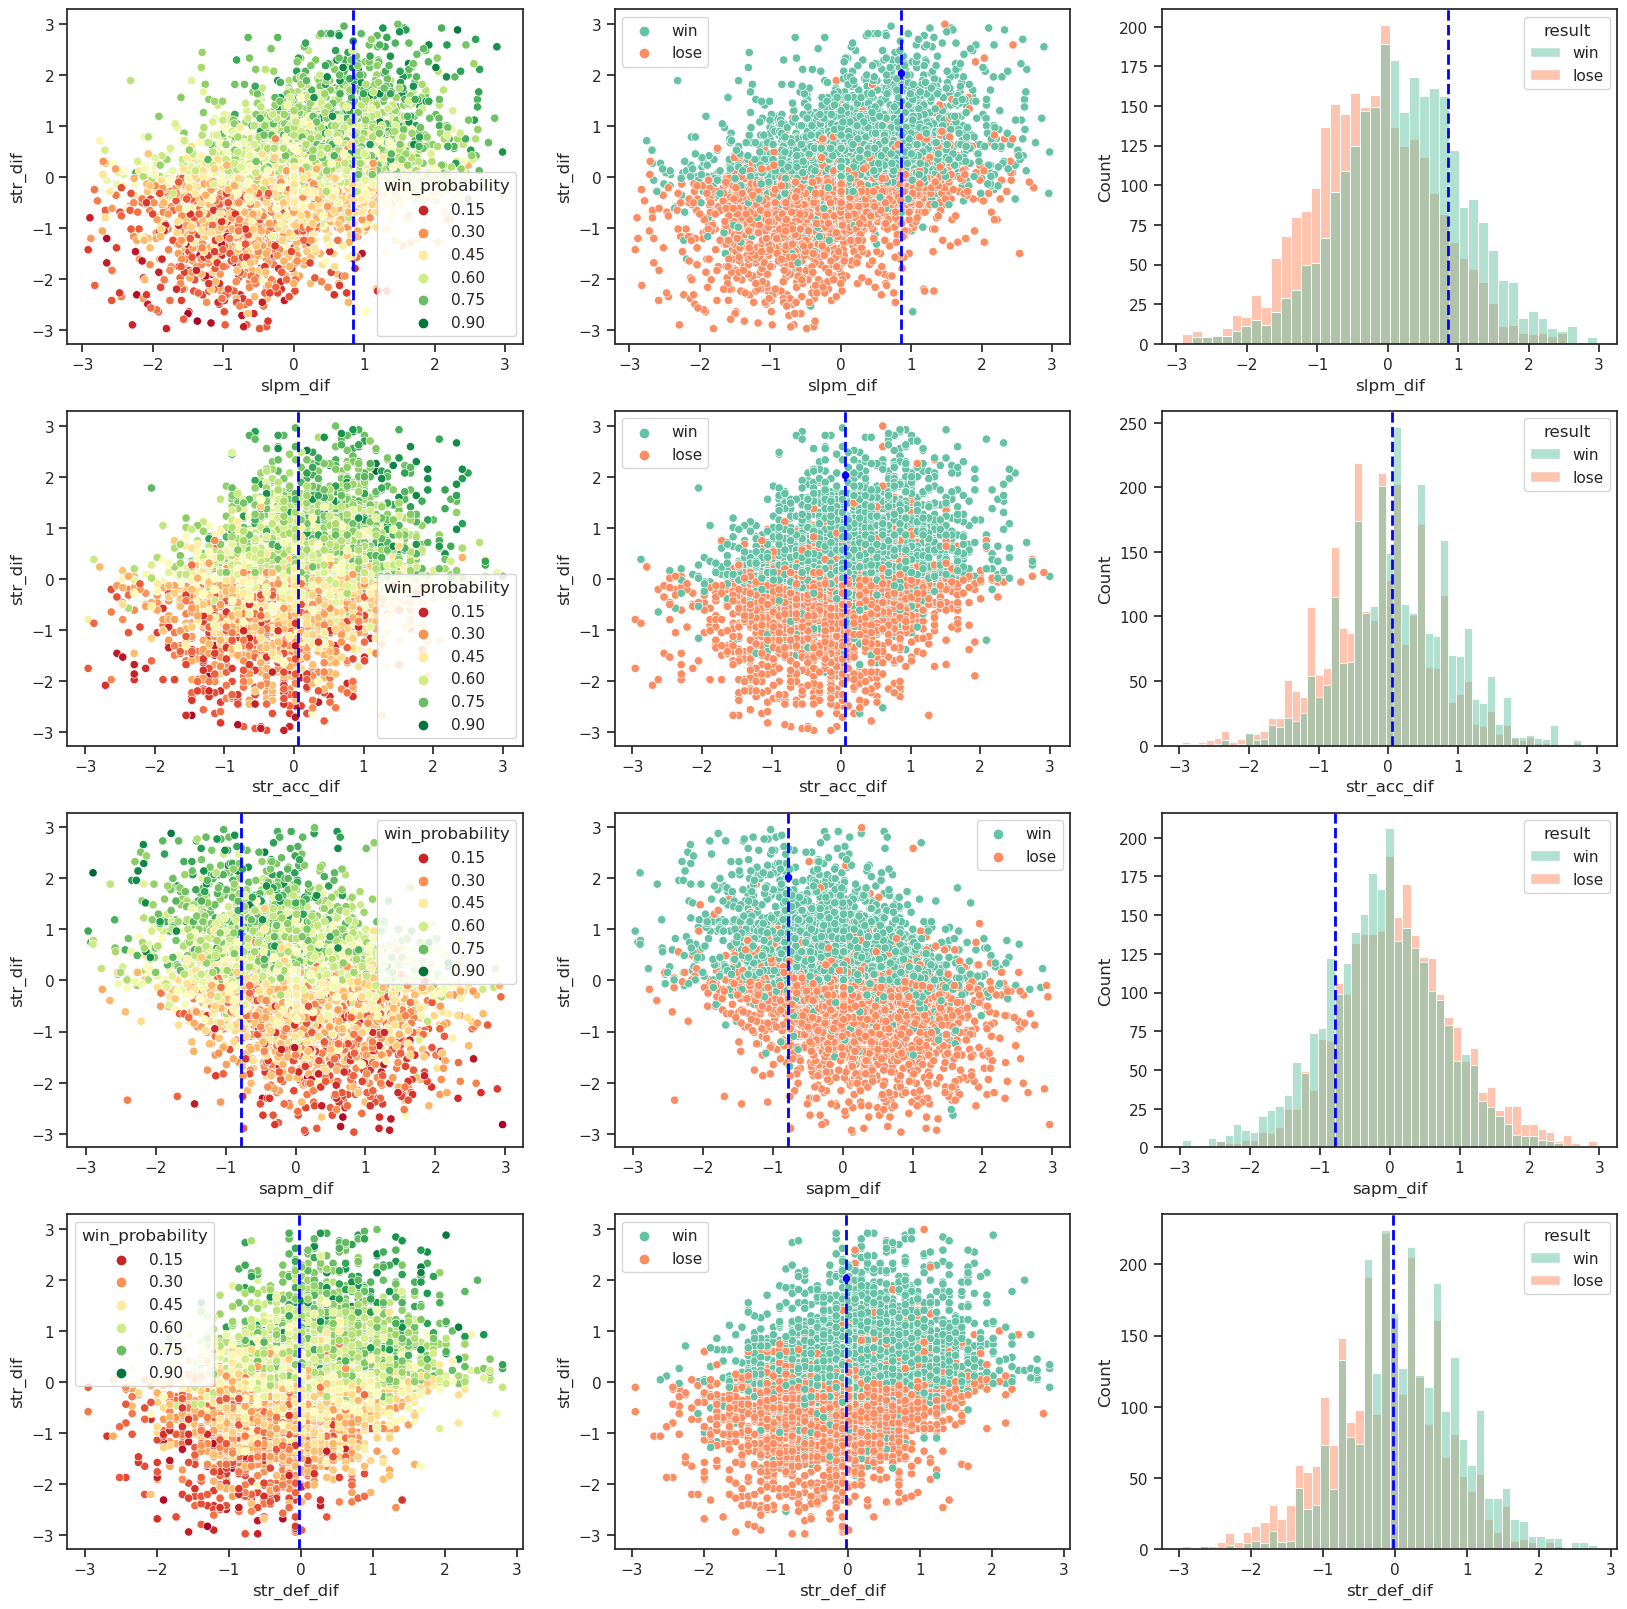

In [273]:
rows=4
cols=3
sns.set_palette("Set2")
fig, axs = plt.subplots(rows,cols,figsize = (20,20))
COLOR='blue'
ALPHA = 1
PALETTE = 'RdYlGn'
data = df[(df.outlier==False)&(df.lof_outlier==False)]

ys = ['kd_dif','str_dif','td_dif','sub_dif'],
features = [['slpm_dif','str_acc_dif','sapm_dif','str_def_dif'],
         ['slpm_dif','str_acc_dif','sapm_dif','str_def_dif'],
         ['td_avg_dif','td_def_dif','sub_avg_dif'],
         ['sub_avg_dif']]

y,x = 'str_dif','slpm_dif'
i,j = 0,0
sns.scatterplot(ax=axs[i,j], x=x, y=y, data=data, hue='win_probability', alpha=ALPHA, palette=PROB_PALETTE)
axs[i,j].axvline(x=match_df.loc[0,x], color=COLOR, linestyle='--')

sns.scatterplot(ax=axs[i,j+1], x=x, y=y, data=data, hue='result', alpha=ALPHA)
axs[i,j+1].axvline(x=match_df.loc[0,x], color=COLOR, linestyle='--')
sns.scatterplot(ax=axs[i,j+1], x=x, y=y, data=match_df,color=COLOR)

sns.histplot(ax=axs[i,j+2], data=data,x=x, hue='result')
axs[i,j+2].axvline(x=match_df.loc[0,x], color=COLOR, linestyle='--')

y,x = 'str_dif','str_acc_dif'
i,j = 1,0
sns.scatterplot(ax=axs[i,j], x=x, y=y, data=data, hue='win_probability', alpha=ALPHA, palette=PROB_PALETTE)
axs[i,j].axvline(x=match_df.loc[0,x], color=COLOR, linestyle='--')

sns.scatterplot(ax=axs[i,j+1], x=x, y=y, data=data, hue='result', alpha=ALPHA)
axs[i,j+1].axvline(x=match_df.loc[0,x], color=COLOR, linestyle='--')
sns.scatterplot(ax=axs[i,j+1], x=x, y=y, data=match_df,color=COLOR)

sns.histplot(ax=axs[i,j+2], data=data,x=x, hue='result')
axs[i,j+2].axvline(x=match_df.loc[0,x], color=COLOR, linestyle='--')

y,x = 'str_dif','sapm_dif'
i,j = 2,0
sns.scatterplot(ax=axs[i,j], x=x, y=y, data=data, hue='win_probability', alpha=ALPHA, palette=PROB_PALETTE)
axs[i,j].axvline(x=match_df.loc[0,x], color=COLOR, linestyle='--')

sns.scatterplot(ax=axs[i,j+1], x=x, y=y, data=data, hue='result', alpha=ALPHA)
axs[i,j+1].axvline(x=match_df.loc[0,x], color=COLOR, linestyle='--')
sns.scatterplot(ax=axs[i,j+1], x=x, y=y, data=match_df,color=COLOR)

sns.histplot(ax=axs[i,j+2], data=data,x=x, hue='result')
axs[i,j+2].axvline(x=match_df.loc[0,x], color=COLOR, linestyle='--')

y,x = 'str_dif','str_def_dif'
i,j = 3,0
sns.scatterplot(ax=axs[i,j], x=x, y=y, data=data, hue='win_probability', alpha=ALPHA, palette=PROB_PALETTE)
axs[i,j].axvline(x=match_df.loc[0,x], color=COLOR, linestyle='--')

sns.scatterplot(ax=axs[i,j+1], x=x, y=y, data=data, hue='result', alpha=ALPHA)
axs[i,j+1].axvline(x=match_df.loc[0,x], color=COLOR, linestyle='--')
sns.scatterplot(ax=axs[i,j+1], x=x, y=y, data=match_df,color=COLOR)

sns.histplot(ax=axs[i,j+2], data=data,x=x, hue='result')
axs[i,j+2].axvline(x=match_df.loc[0,x], color=COLOR, linestyle='--')

#### <span style='color:green'> **[done]** </span>Model Visualization: Takedowns

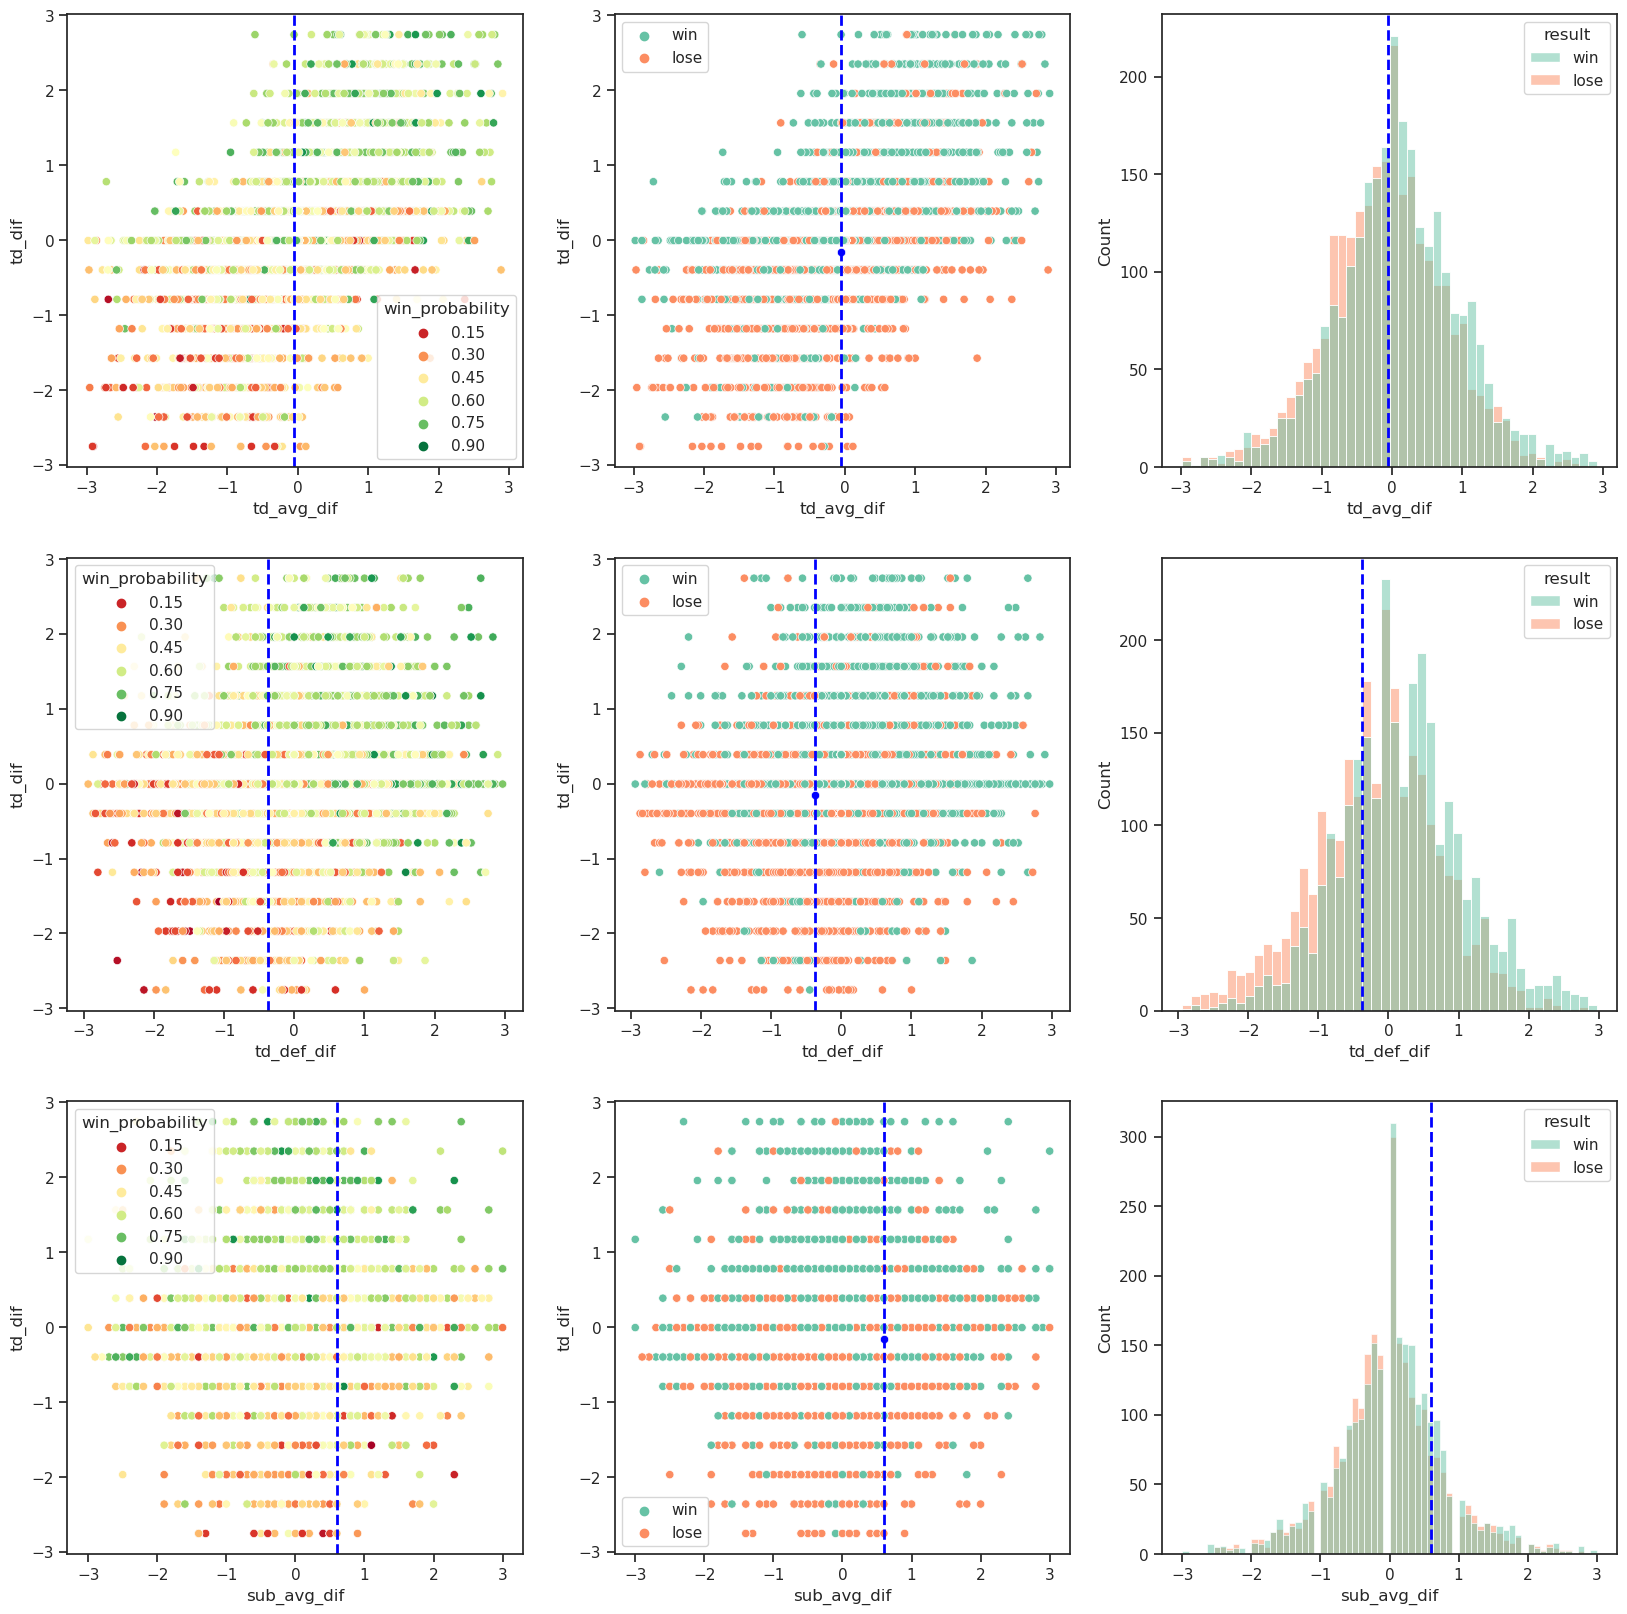

In [274]:
rows=3
cols=3
sns.set_palette("Set2")
fig, axs = plt.subplots(rows,cols,figsize = (20,20))
COLOR='blue'
ALPHA = 1
PALETTE = 'RdYlGn'
data = df[(df.outlier==False)&(df.lof_outlier==False)]

ys = ['kd_dif','str_dif','td_dif','sub_dif'],
features = [['slpm_dif','str_acc_dif','sapm_dif','str_def_dif'],
         ['slpm_dif','str_acc_dif','sapm_dif','str_def_dif'],
         ['td_avg_dif','td_def_dif','sub_avg_dif'],
         ['sub_avg_dif']]

y,x = 'td_dif','td_avg_dif'
i,j = 0,0
sns.scatterplot(ax=axs[i,j], x=x, y=y, data=data, hue='win_probability', alpha=ALPHA, palette=PROB_PALETTE)
axs[i,j].axvline(x=match_df.loc[0,x], color=COLOR, linestyle='--')

sns.scatterplot(ax=axs[i,j+1], x=x, y=y, data=data, hue='result', alpha=ALPHA)
axs[i,j+1].axvline(x=match_df.loc[0,x], color=COLOR, linestyle='--')
sns.scatterplot(ax=axs[i,j+1], x=x, y=y, data=match_df,color=COLOR)

sns.histplot(ax=axs[i,j+2], data=data,x=x, hue='result')
axs[i,j+2].axvline(x=match_df.loc[0,x], color=COLOR, linestyle='--')

y,x = 'td_dif','td_def_dif'
i,j = 1,0
sns.scatterplot(ax=axs[i,j], x=x, y=y, data=data, hue='win_probability', alpha=ALPHA, palette=PROB_PALETTE)
axs[i,j].axvline(x=match_df.loc[0,x], color=COLOR, linestyle='--')

sns.scatterplot(ax=axs[i,j+1], x=x, y=y, data=data, hue='result', alpha=ALPHA)
axs[i,j+1].axvline(x=match_df.loc[0,x], color=COLOR, linestyle='--')
sns.scatterplot(ax=axs[i,j+1], x=x, y=y, data=match_df,color=COLOR)

sns.histplot(ax=axs[i,j+2], data=data,x=x, hue='result')
axs[i,j+2].axvline(x=match_df.loc[0,x], color=COLOR, linestyle='--')

y,x = 'td_dif','sub_avg_dif'
i,j = 2,0
sns.scatterplot(ax=axs[i,j], x=x, y=y, data=data, hue='win_probability', alpha=ALPHA, palette=PROB_PALETTE)
axs[i,j].axvline(x=match_df.loc[0,x], color=COLOR, linestyle='--')

sns.scatterplot(ax=axs[i,j+1], x=x, y=y, data=data, hue='result', alpha=ALPHA)
axs[i,j+1].axvline(x=match_df.loc[0,x], color=COLOR, linestyle='--')
sns.scatterplot(ax=axs[i,j+1], x=x, y=y, data=match_df,color=COLOR)

sns.histplot(ax=axs[i,j+2], data=data,x=x, hue='result')
axs[i,j+2].axvline(x=match_df.loc[0,x], color=COLOR, linestyle='--')

#### <span style='color:green'> **[done]** </span>Model Visualization: Submissions

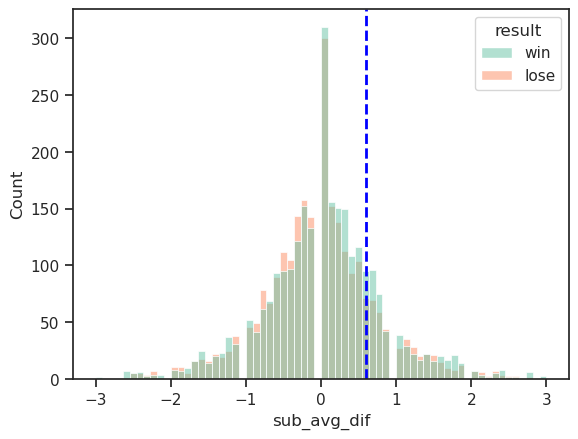

In [275]:
y,x = 'sub_dif','sub_avg_dif'
sns.histplot(data=data,x=x, hue='result')
plt.axvline(x=match_df.loc[0,x], color=COLOR, linestyle='--')

#### <span style='color:green'> **[done]** </span>Predict method:

In [276]:
#prepare 'result' as feature:
df = pd.concat([df,match_df]).reset_index(drop=True)

for i in range(len(df)):
    if df.loc[i,'result'] == 'win':
        df.loc[i,'result'] = int(1)
    else:
        df.loc[i,'result'] = int(0)

df.tail()

,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,outlier,lof_outlier,win_probability
6364,1,Montel Jackson,Rani Yahya,2023-04-22,Bantamweight,KO/TKO,Punch,1.336643,0.048134,-0.005118,0.003509,0.327353,1.553742,-1.6,1.116451,1.343480,-0.213869,1.235617,1.546458,-0.058323,0.542845,0.000000,False,False,0.723809
6365,0,Karol Rosa,Norma Dumont,2023-04-22,Women's Featherweight,U-DEC,Unanimous,1.336643,-0.099089,-0.397787,0.003509,0.164862,-0.140564,0.0,1.342133,0.598838,1.143440,-1.470343,-0.131691,0.189244,-0.571006,1.019062,False,False,0.601054
6366,1,Mohammed Usman,Junior Tafa,2023-04-22,Heavyweight,U-DEC,Unanimous,-0.008237,-0.577567,0.780221,0.003509,0.831636,-2.872200,0.0,-0.337947,-0.724972,1.370710,-2.081366,-0.131691,2.466859,0.542845,0.000000,False,True,0.336704
6367,1,William Gomis,Francis Marshall,2023-04-22,Featherweight,S-DEC,Split,-0.008237,0.416194,-0.790457,-1.715509,-1.235925,2.452761,-0.8,-1.315903,0.516100,-1.545925,2.108507,1.546458,-0.008809,-0.014081,0.000000,False,False,0.471696
6368,1,Aljamain Sterling,Henry Cejudo,2023-05-29,Bantamweight,None,None,0.686254,2.034142,-0.153054,0.584883,-0.050000,-0.380000,0.6,0.850000,0.050000,-0.780000,-0.020000,1.409642,0.064000,9.000000,-1.000000,None,None,0.753379


In [277]:
method_pred = load_trained_model(file_path='../global_variables/method_pred_knn_classifier.pkl')
method_pred

KNeighborsClassifier(n_neighbors=100)

In [278]:
df['method'] = method_pred.predict(df[method_pred.feature_names_in_])
df.tail(3)

,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,outlier,lof_outlier,win_probability
6366,1,Mohammed Usman,Junior Tafa,2023-04-22,Heavyweight,decision,Unanimous,-0.008237,-0.577567,0.780221,0.003509,0.831636,-2.872200,0.0,-0.337947,-0.724972,1.370710,-2.081366,-0.131691,2.466859,0.542845,0.0,False,True,0.336704
6367,1,William Gomis,Francis Marshall,2023-04-22,Featherweight,decision,Split,-0.008237,0.416194,-0.790457,-1.715509,-1.235925,2.452761,-0.8,-1.315903,0.516100,-1.545925,2.108507,1.546458,-0.008809,-0.014081,0.0,False,False,0.471696
6368,1,Aljamain Sterling,Henry Cejudo,2023-05-29,Bantamweight,decision,None,0.686254,2.034142,-0.153054,0.584883,-0.050000,-0.380000,0.6,0.850000,0.050000,-0.780000,-0.020000,1.409642,0.064000,9.000000,-1.0,None,None,0.753379


In [279]:
df['method_probability'] = method_pred.predict_proba(df[method_pred.feature_names_in_])[:,1]
df.tail(3)

,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,outlier,lof_outlier,win_probability,method_probability
6366,1,Mohammed Usman,Junior Tafa,2023-04-22,Heavyweight,decision,Unanimous,-0.008237,-0.577567,0.780221,0.003509,0.831636,-2.872200,0.0,-0.337947,-0.724972,1.370710,-2.081366,-0.131691,2.466859,0.542845,0.0,False,True,0.336704,0.36
6367,1,William Gomis,Francis Marshall,2023-04-22,Featherweight,decision,Split,-0.008237,0.416194,-0.790457,-1.715509,-1.235925,2.452761,-0.8,-1.315903,0.516100,-1.545925,2.108507,1.546458,-0.008809,-0.014081,0.0,False,False,0.471696,0.27
6368,1,Aljamain Sterling,Henry Cejudo,2023-05-29,Bantamweight,decision,None,0.686254,2.034142,-0.153054,0.584883,-0.050000,-0.380000,0.6,0.850000,0.050000,-0.780000,-0.020000,1.409642,0.064000,9.000000,-1.0,None,None,0.753379,0.40


<AxesSubplot:xlabel='slpm_dif', ylabel='str_dif'>

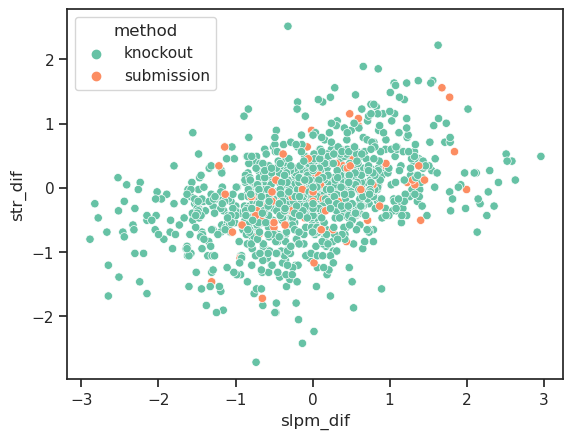

In [289]:
data = df[(df.outlier==False)&(df.lof_outlier==False)]
sns.scatterplot( x='slpm_dif', y='str_dif', data=data[data.method!='decision'], hue='method', alpha=ALPHA)
#sns.scatterplot( x='slpm_dif', y='str_dif', data=data[data.method=='submission'], hue='method', alpha=ALPHA)

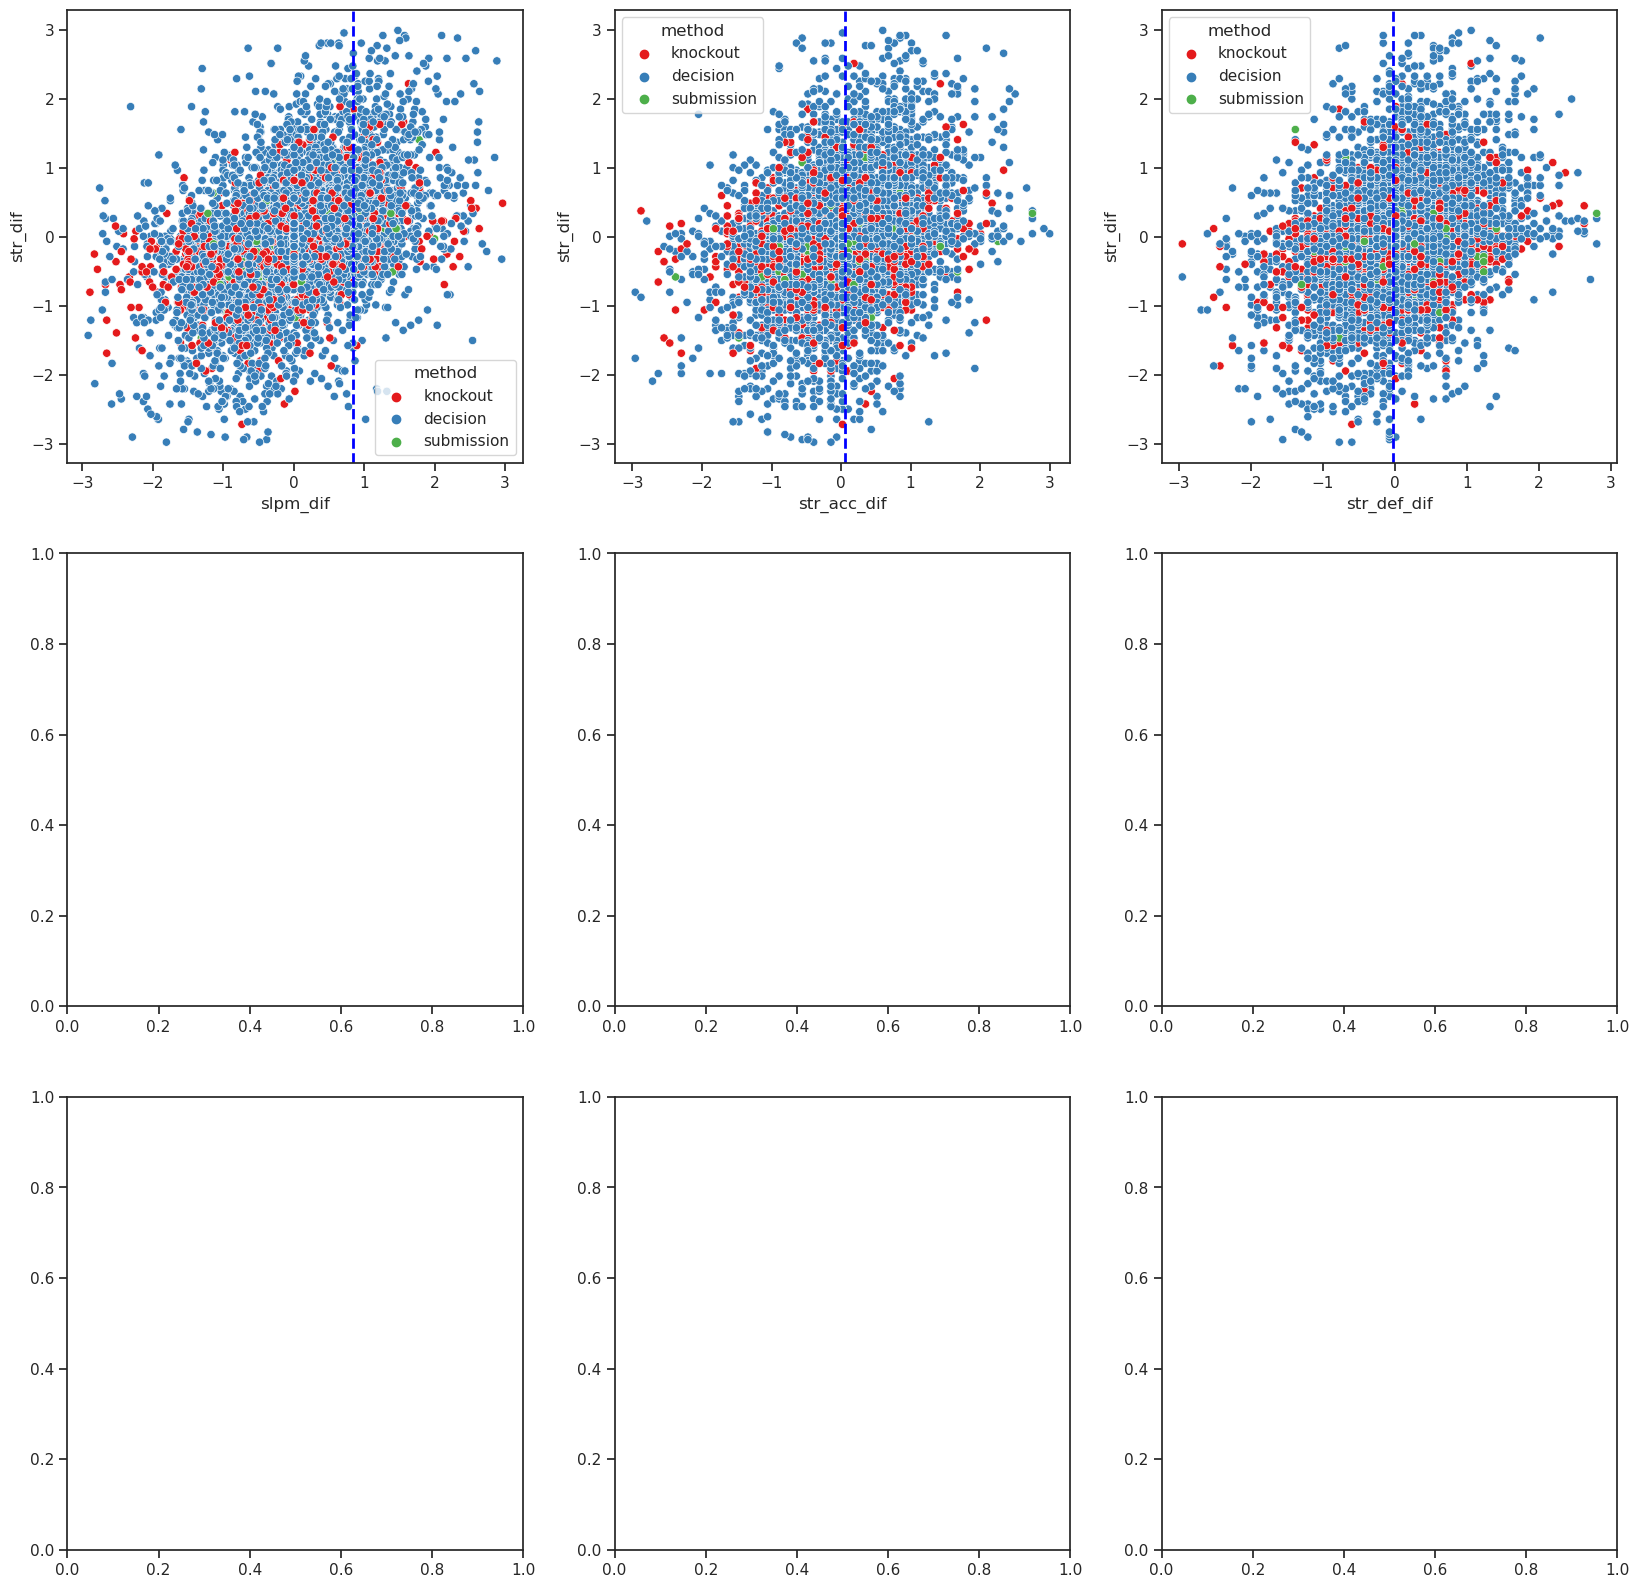

In [299]:
rows=3
cols=3
sns.set_palette("Set1")
fig, axs = plt.subplots(rows,cols,figsize = (20,20))
COLOR='blue'
ALPHA = 1
data = df[(df.outlier==False)&(df.lof_outlier==False)]

ys = ['kd_dif','str_dif','td_dif','sub_dif'],
features = [['slpm_dif','str_acc_dif','sapm_dif','str_def_dif'],
         ['slpm_dif','str_acc_dif','sapm_dif','str_def_dif'],
         ['td_avg_dif','td_def_dif','sub_avg_dif'],
         ['sub_avg_dif']]

y,x = 'str_dif','slpm_dif'
i,j = 0,0
sns.scatterplot(ax=axs[i,j], x=x, y=y, data=data, hue='method', alpha=ALPHA)
axs[i,j].axvline(x=match_df.loc[0,x], color=COLOR, linestyle='--')

y,x = 'str_dif','str_acc_dif'
i,j = 0,1
sns.scatterplot(ax=axs[i,j], x=x, y=y, data=data, hue='method', alpha=ALPHA)
axs[i,j].axvline(x=match_df.loc[0,x], color=COLOR, linestyle='--')

y,x = 'str_dif','str_def_dif'
i,j = 0,2
sns.scatterplot(ax=axs[i,j], x=x, y=y, data=data, hue='method', alpha=ALPHA)
axs[i,j].axvline(x=match_df.loc[0,x], color=COLOR, linestyle='--')

#sns.scatterplot(ax=axs[i,j+1], x=x, y=y, data=data, hue='result', alpha=ALPHA)
#axs[i,j+1].axvline(x=match_df.loc[0,x], color=COLOR, linestyle='--')
#sns.scatterplot(ax=axs[i,j+1], x=x, y=y, data=match_df,color=COLOR)

#sns.histplot(ax=axs[i,j+2], data=data,x=x, hue='result')
#axs[i,j+2].axvline(x=match_df.loc[0,x], color=COLOR, linestyle='--')

In [ ]:
>>>>>>>>>>>>>>>>>